# Figure S1a-c

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

import replay_structure.structure_models as models
import replay_structure.metadata as meta 
import replay_structure.read_write as read_write

import importlib

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
ripple_data = dict()
for session in meta.Session_List:
    ripple_data[str(session)] =  read_write.load_spikemat_data(session, meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name)

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat1day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat1day2_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat2day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat2day2_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat3day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat3day2_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat4day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat4day2_4cm_3ms.obj


In [4]:
time_window_ms_array = [3,4,5]
ripple_mc_results = dict()
mc_results = dict()
random_effects_results = dict()
max_ll_results = dict()

for time_window_ms in time_window_ms_array:
    mc_results[time_window_ms] = dict()
    random_effects_results[time_window_ms] = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
    ripple_mc_results[time_window_ms] = dict()
    max_ll_results[time_window_ms] = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
    for i, session in enumerate(meta.Session_List):
        mc_results[time_window_ms][str(session)] = read_write.load_model_comparison_results(session, time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function, ext='')
        ripple_mc_results[time_window_ms][str(session)] = read_write.load_model_comparison_results(session, time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function, ext='')
        random_effects_results[time_window_ms][i] = ripple_mc_results[time_window_ms][str(session)].random_effects_results["p_models"]
        max_ll = ripple_mc_results[time_window_ms][str(session)].results_dataframe["mll_model"].value_counts()
        for model in meta.MODELS_AS_STR:
            if model not in max_ll:
                max_ll[model] = 0
        max_ll_results[time_window_ms][i] = max_ll[meta.MODELS_AS_STR]/np.sum(max_ll)

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2da

In [5]:
bayes_factor = np.zeros((meta.N_SESSIONS, meta.N_MODELS))

for i, session in enumerate(meta.Session_List):
    sum_over_all = mc_results[3][str(session)].results_dataframe[meta.MODELS_AS_STR].sum(axis=0)
    sum_over_all_norm = sum_over_all - sum_over_all.max()
    sum_over_all_exp = np.exp(sum_over_all_norm)
    sum_over_all_exp_norm = sum_over_all_exp/sum_over_all_exp.sum()
    bayes_factor[i] = sum_over_all_exp_norm

In [6]:
ripple_lengths = dict()
for session in meta.Session_List:
    ripple_lengths[str(session)] = np.zeros(len(ripple_data[str(session)].ripple_info['spikemats_popburst']))
    for ripple in range(len(ripple_data[str(session)].ripple_info['spikemats_popburst'])):
        if ripple_data[str(session)].ripple_info['spikemats_popburst'][ripple] is not None:
            ripple_lengths[str(session)][ripple] = ripple_data[str(session)].ripple_info['spikemats_popburst'][ripple].shape[0]     

<ipython-input-7-0ef5bbf5409b>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ripple_mll_all = pd.Series([])


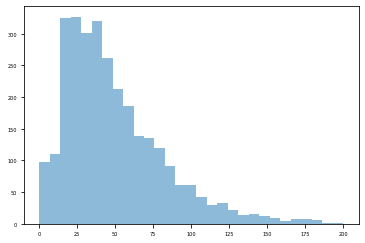

In [7]:
time_window_ms = 3
ripple_lengths_all = np.array([])
ripple_mll_all = pd.Series([])
for session in meta.Session_List:
    ripple_lengths_all = np.append(ripple_lengths_all, ripple_lengths[str(session)])
    max_ll = ripple_mc_results[time_window_ms][str(session)].results_dataframe["mll_model"]
    ripple_mll_all = ripple_mll_all.append(max_ll)

plt.hist(ripple_lengths_all, alpha=.5, bins=np.linspace(0,200,30))
plt.show()

In [8]:
ripple_lengths_sort = np.sort(ripple_lengths_all)
n_ripples = len(ripple_lengths_all)
q1 = ripple_lengths_sort[int(n_ripples/4)]
q2 = ripple_lengths_sort[int(n_ripples/2)]
q3 = ripple_lengths_sort[n_ripples - int(n_ripples/4)]
print(q1, q2, q3)

25.0 42.0 66.0


In [9]:
n_groups = 4
group_1 = ripple_mll_all[ripple_lengths_all<q1]
group_2 = ripple_mll_all[(ripple_lengths_all>=q1) & (ripple_lengths_all<q2)]
group_3 = ripple_mll_all[(ripple_lengths_all>=q2) & (ripple_lengths_all<q3)]
group_4 = ripple_mll_all[(ripple_lengths_all>=q3)]

print(len(group_1), len(group_2), len(group_3), len(group_4))

710 770 739 761


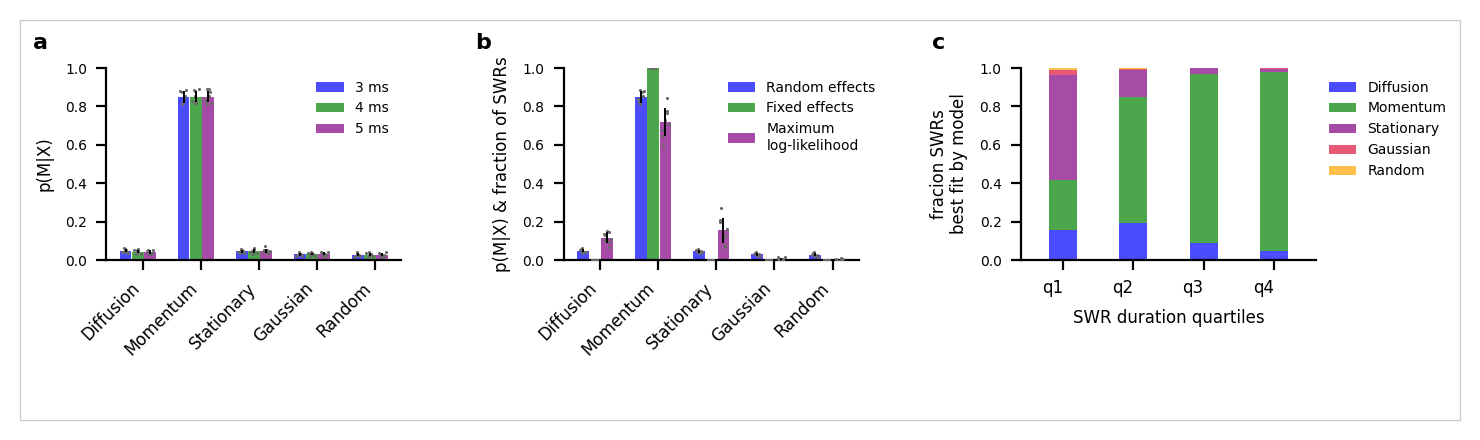

In [11]:
figure_width = 7.2
figure_height = 2
fig, ax = plt.subplots(1,3,figsize=(figure_width,figure_height), dpi=200)
plt.subplots_adjust(left=.06, wspace=.55, right = .9, bottom=.4)
footer = .25
margin = .1

colors = ["blue", "green", "purple", "crimson", 'orange']
model_names_dict = {'diffusion': 'Diffusion', 
               'momentum': 'Momentum', 
               'stationary': 'Stationary', 
               'stationary_gaussian': 'Gaussian', 
               'random': 'Random'}
model_names = [model_names_dict[model] for model in meta.MODELS_AS_STR]

j = 0
for i, time_window_ms in enumerate(time_window_ms_array):
    p_models_mean = np.mean(random_effects_results[time_window_ms], axis=0)
    p_models_sd = np.std(random_effects_results[time_window_ms], axis=0)
    ax[j].bar(np.arange(meta.N_MODELS)+.21*i, p_models_mean, yerr=p_models_sd,
            width=.2, label=f"{time_window_ms} ms", color=colors[i], alpha=.7, error_kw=dict(lw=.7, zorder=101))
    for s in range(meta.N_SESSIONS):
        ax[j].scatter(np.arange(meta.N_MODELS)+.21*i+(np.random.rand()-.5)/8, random_effects_results[time_window_ms][s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)
    
ax[j].set_xticks(np.arange(meta.N_MODELS)+.3)
ax[j].set_ylim([0,1])
ax[j].set_xticklabels(model_names, rotation=45, ha='right', fontsize=6)
ax[j].set_ylabel("p(M|X)")
ax[j].legend(frameon=False, fontsize=5)
ax[j].spines['top'].set_visible(False)
ax[j].spines['right'].set_visible(False)

j = 1
time_window_ms = 3
i = 0
p_models_mean = np.mean(random_effects_results[time_window_ms], axis=0)
p_models_sd = np.std(random_effects_results[time_window_ms], axis=0)
ax[j].bar(np.arange(meta.N_MODELS)+.21*i, p_models_mean, yerr=p_models_sd,
        width=.2, label="Random effects", color=colors[i], alpha=.7, error_kw=dict(lw=.7, zorder=101))
for s in range(meta.N_SESSIONS):
    ax[j].scatter(np.arange(meta.N_MODELS)+.21*i+(np.random.rand()-.5)/8, random_effects_results[time_window_ms][s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)

i = 1
p_models_mean = np.mean(bayes_factor, axis=0)
p_models_sd = np.std(bayes_factor, axis=0)
ax[j].bar(np.arange(meta.N_MODELS)+.21*i, p_models_mean, yerr=p_models_sd,
        width=.2, label="Fixed effects", color=colors[i], alpha=.7, error_kw=dict(lw=.7, zorder=101))
for s in range(meta.N_SESSIONS):
    ax[j].scatter(np.arange(meta.N_MODELS)+.21*i+(np.random.rand()-.5)/8, bayes_factor[s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)

i = 2
p_models_mean = np.mean(max_ll_results[time_window_ms], axis=0)
p_models_sd = np.std(max_ll_results[time_window_ms], axis=0)
ax[j].bar(np.arange(meta.N_MODELS)+.21*i, p_models_mean, yerr=p_models_sd,
        width=.2, label="Maximum\nlog-likelihood", color=colors[i], alpha=.7, error_kw=dict(lw=.7, zorder=101))
for s in range(meta.N_SESSIONS):
    ax[j].scatter(np.arange(meta.N_MODELS)+.21*i+(np.random.rand()-.5)/8, max_ll_results[time_window_ms][s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)


    

ax[j].set_xticks(np.arange(meta.N_MODELS)+.3)
ax[j].set_ylim([0,1])
ax[j].set_xticklabels(model_names, rotation=45, ha='right', fontsize=6)
ax[j].set_ylabel("p(M|X) & fraction of SWRs")
ax[j].legend(frameon=False, loc=1, bbox_to_anchor=(1.1,1,0,0), fontsize=5)
ax[j].spines['top'].set_visible(False)
ax[j].spines['right'].set_visible(False)

mc_by_swr_duration = np.zeros((n_groups, meta.N_MODELS))

for i, group in enumerate([group_1, group_2, group_3, group_4]):
    mean = group.value_counts()/np.sum(group.value_counts())
    for model in meta.MODELS_AS_STR:
        if model not in mean:
            mean[model] = 0
    mc_by_swr_duration[i] = mean[meta.MODELS_AS_STR]

for i in range(meta.N_MODELS):
    if i == 0:
        bottom = np.zeros(n_groups)
    elif i == 1:
        bottom = mc_by_swr_duration[:,0]
    else:
        bottom = np.sum(mc_by_swr_duration[:,:i], axis=1)
    ax[2].bar(np.arange(n_groups), mc_by_swr_duration[:,i], bottom=bottom,#, yerr=p_models_sd,
            width=.4, label=model_names[i], color=colors[i], alpha=.7)
    
ax[2].set_xticks(np.arange(n_groups))
ax[2].set_xlim([-.6,3.6])
ax[2].set_ylim([0,1])
ax[2].set_xticklabels(['q1', 'q2', 'q3', 'q4'], rotation=0, ha='right', fontsize=6)
ax[2].set_xlabel('SWR duration quartiles')
ax[2].set_ylabel("fracion SWRs\nbest fit by model")#, fontsize=18)
ax[2].legend(frameon=False, bbox_to_anchor=(1,1,0,0), fontsize=5)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)


ax[0].text(-.25,1.1, 'a', size=8, transform=ax[0].transAxes, fontweight='bold')
ax[1].text(-.3,1.1, 'b', size=8, transform=ax[1].transAxes, fontweight='bold')
ax[2].text(-.3,1.1, 'c', size=8, transform=ax[2].transAxes, fontweight='bold')

plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS1a-c.svg"), dpi=500, transparent=True)

rect = plt.Rectangle(
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

In [12]:
for time_window_ms in time_window_ms_array:
    print(f"time window (ms): {time_window_ms}")
    for i, session in enumerate(meta.Session_List):
        print(mc_results[time_window_ms][str(session)].random_effects_results['p_exceedance'])

time window (ms): 3
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
time window (ms): 4
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
time window (ms): 5
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
